# exploring the omniglot dataset

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

## check which alphabets we have to play with 

- grab the path
- sort the lists for bg and eval
- generate a numbered list and a list len value for each

In [2]:
data_path = "../../omniglot/python"

background_path = os.path.join(data_path, "images_background")
evaluation_path = os.path.join(data_path, "images_evaluation")

In [3]:
print("Available alphabets in background set:")
bg_alphabets = sorted(os.listdir(background_path))
for i, alphabet in enumerate(bg_alphabets):
    print(f"{i+1:2d}. {alphabet}")

print(f"\nTotal background alphabets: {len(bg_alphabets)}")


Available alphabets in background set:
 1. .DS_Store
 2. Alphabet_of_the_Magi
 3. Anglo-Saxon_Futhorc
 4. Arcadian
 5. Armenian
 6. Asomtavruli_(Georgian)
 7. Balinese
 8. Bengali
 9. Blackfoot_(Canadian_Aboriginal_Syllabics)
10. Braille
11. Burmese_(Myanmar)
12. Cyrillic
13. Early_Aramaic
14. Futurama
15. Grantha
16. Greek
17. Gujarati
18. Hebrew
19. Inuktitut_(Canadian_Aboriginal_Syllabics)
20. Japanese_(hiragana)
21. Japanese_(katakana)
22. Korean
23. Latin
24. Malay_(Jawi_-_Arabic)
25. Mkhedruli_(Georgian)
26. N_Ko
27. Ojibwe_(Canadian_Aboriginal_Syllabics)
28. Sanskrit
29. Syriac_(Estrangelo)
30. Tagalog
31. Tifinagh

Total background alphabets: 31


In [4]:
eval_alphabets = sorted(os.listdir(evaluation_path))
print("Available alphabets in evaluation set:")
for i, alphabet in enumerate(eval_alphabets):
    print(f"{i+1:2d}. {alphabet}")
print(f"\nTotal evaluation alphabets: {len(eval_alphabets)}")


Available alphabets in evaluation set:
 1. .DS_Store
 2. Angelic
 3. Atemayar_Qelisayer
 4. Atlantean
 5. Aurek-Besh
 6. Avesta
 7. Ge_ez
 8. Glagolitic
 9. Gurmukhi
10. Kannada
11. Keble
12. Malayalam
13. Manipuri
14. Mongolian
15. Old_Church_Slavonic_(Cyrillic)
16. Oriya
17. Sylheti
18. Syriac_(Serto)
19. Tengwar
20. Tibetan
21. ULOG

Total evaluation alphabets: 21


(31 alphabets in the background set, 21 in the eval set)

In [5]:
def show_alphabet_samples(alphabet_name, num_chars=5, num_samples=4):
    alphabet_path = os.path.join(background_path, alphabet_name)
    characters = sorted([d for d in os.listdir(alphabet_path) if not d.startswith('.')])[:num_chars]
    
    fig, axes = plt.subplots(num_chars, num_samples, figsize=(12, num_chars*2))
    fig.suptitle(f'{alphabet_name}', fontsize=16)

    # make sure axes is always 2D
    axes = np.atleast_2d(axes)

    for i, char_folder in enumerate(characters):
        char_path = os.path.join(alphabet_path, char_folder)
        images = sorted([f for f in os.listdir(char_path) if f.endswith('.png')])[:num_samples]

        for j, img_file in enumerate(images):
            img = cv2.imread(os.path.join(char_path, img_file), cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_ylabel(f'Char {i+1}', rotation=0, ha='right')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # prevent suptitle overlap
    plt.show()

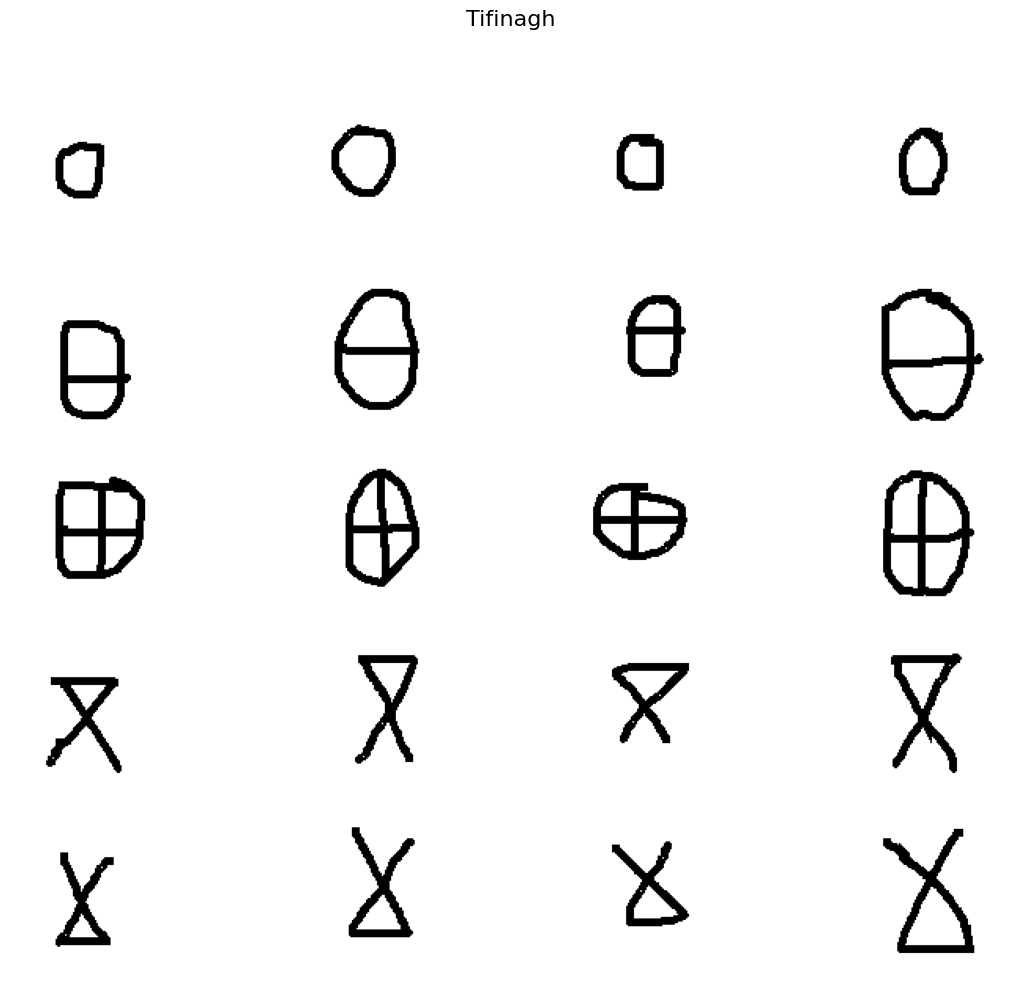

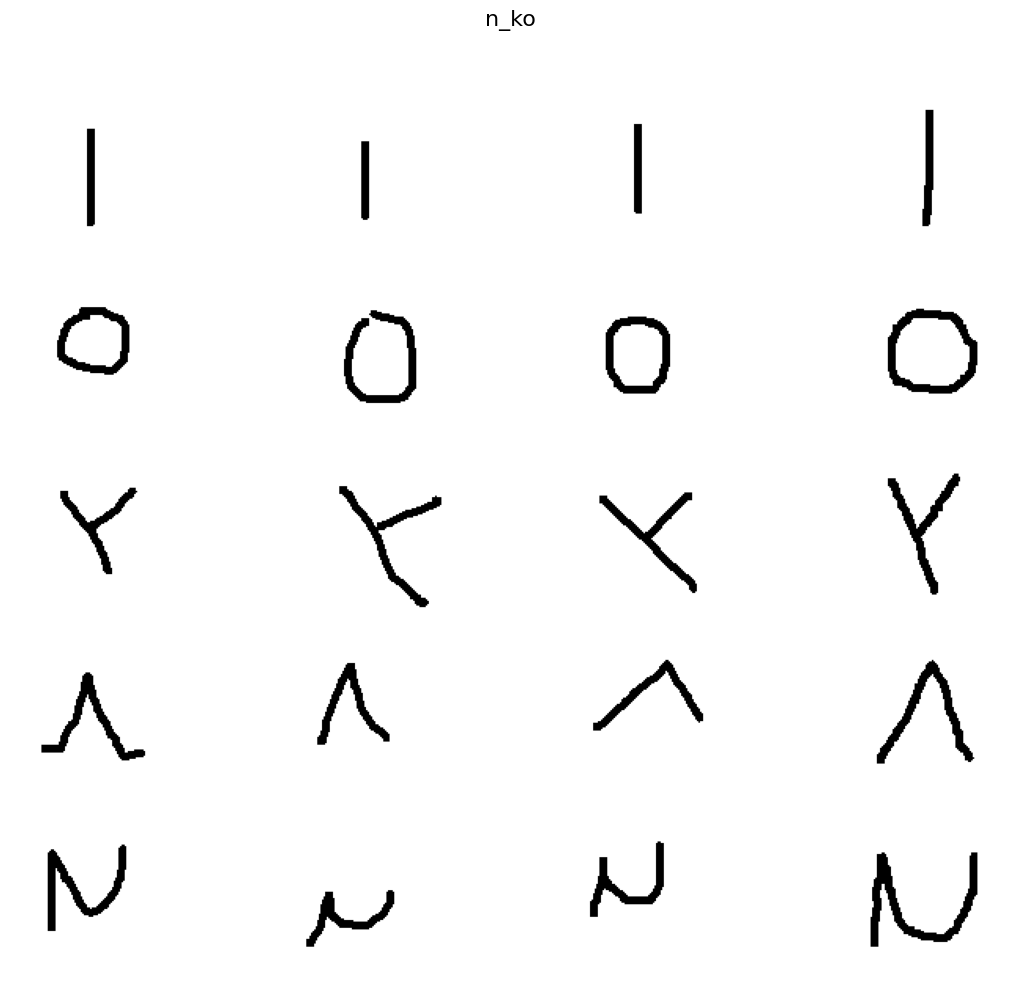

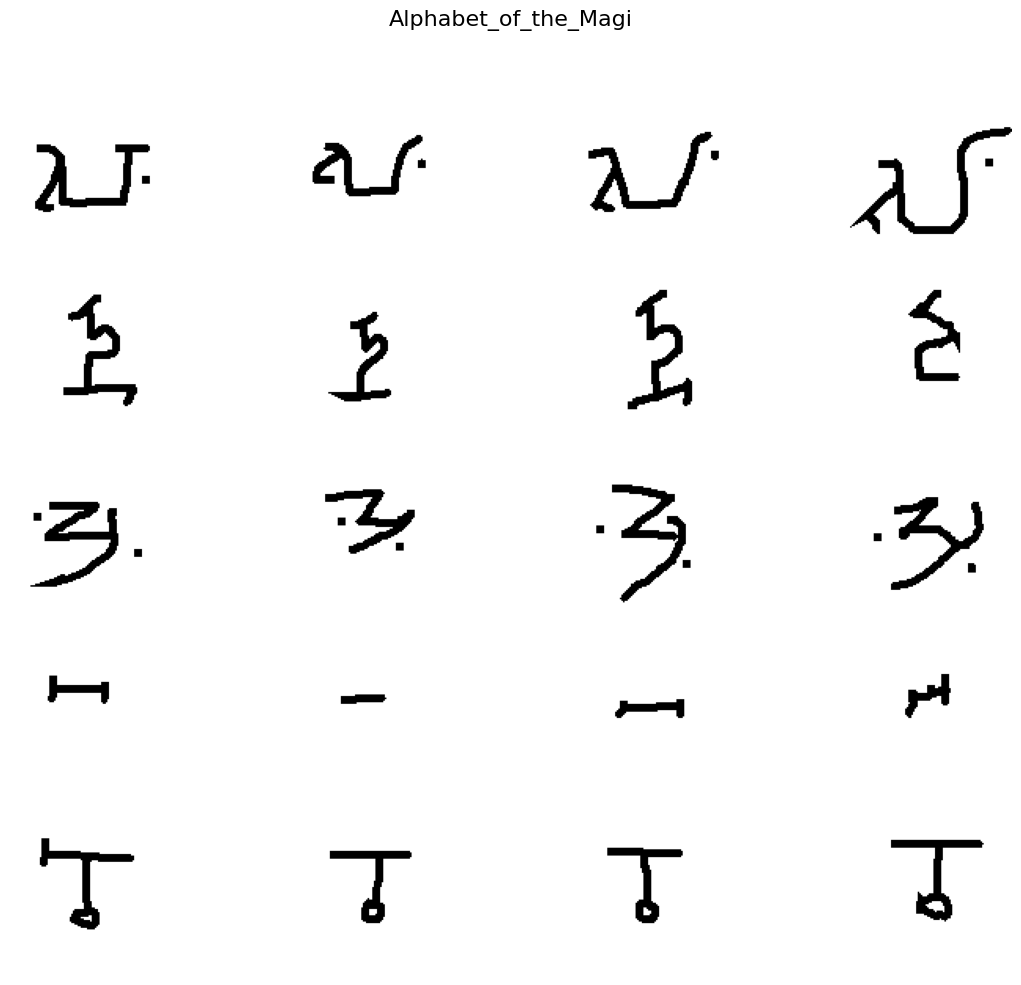

In [6]:
show_alphabet_samples('Tifinagh')
show_alphabet_samples("n_ko")
show_alphabet_samples('Alphabet_of_the_Magi')

In [7]:
# import model functions
from src.models import create_triplet_model, triplet_loss

# create model
triplet_model, base_network = create_triplet_model(embedding_dim=128)

# check the architecture
triplet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ anchor (InputLayer) │ (None, 105, 105,  │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positive            │ (None, 105, 105,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ negative            │ (None, 105, 105,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 128)       │ 10,770,624 │ anchor[0][0],     │
│ (Sequential)        │                   │            │ positive[0][0],   │
│                     │                   │            │ negative[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,770,624 (41.09 MB)

 Trainable params: 10,767,424 (41.07 MB)

 Non-trainable params: 3,200 (12.50 KB)